# Data Science 02: Explorační analýza dat (Data Exploration)

In [1]:
# Instalace potřebných knihoven
#%pip install pandas
#%pip install numpy
#%pip install matplotlib

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

import matplotlib as plt
from matplotlib import pyplot

In [3]:
# Soubor je načten a přiřazen do proměnné ‚df‘
other_path = "../../data/01_DataScience/clean_timelaps.csv"
df = pd.read_csv(other_path)
df.head()

,id,x,y,z,time,delay,type_delay,total_time
0,1,220,95,0,44,0,0,44
1,2,220,252,0,35,0,0,35
2,3,220,440,0,36,109,1,145
3,4,220,690,0,36,0,0,36
4,5,220,940,0,34,0,0,34


### Základní charakteristika datové sady

#### Datové typy

In [4]:
df.dtypes

id            int64
x             int64
y             int64
z             int64
time          int64
delay         int64
type_delay    int64
total_time    int64
dtype: object

#### Popis datové sady

In [5]:
df.describe()

,id,x,y,z,time,delay,type_delay,total_time
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,139.881041,1297.936803,1052.033457,1001.858736,36.360595,5.553903,0.245353,41.914498
std,79.394072,1267.084840,1325.817766,707.763639,6.630443,26.319540,0.800668,27.564242
min,1.000000,95.000000,95.000000,0.000000,22.000000,0.000000,0.000000,22.000000
25%,72.000000,220.000000,220.000000,500.000000,32.000000,0.000000,0.000000,32.000000
50%,139.000000,690.000000,220.000000,1000.000000,36.000000,0.000000,0.000000,36.000000
75%,209.000000,2315.000000,1565.000000,1500.000000,40.000000,0.000000,0.000000,42.000000
max,277.000000,4002.000000,4690.000000,2250.000000,58.000000,260.000000,4.000000,296.000000


#### Základní informace o datové sadě

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          269 non-null    int64
 1   x           269 non-null    int64
 2   y           269 non-null    int64
 3   z           269 non-null    int64
 4   time        269 non-null    int64
 5   delay       269 non-null    int64
 6   type_delay  269 non-null    int64
 7   total_time  269 non-null    int64
dtypes: int64(8)
memory usage: 16.9 KB


### Proces standardizace dat (Data Standardization)

#### Proces normalizace dat (Data Normalization)
Normalizace představuje proces transformace hodnot vybraných proměnných do srovnatelného rozsahu. Typické přístupy zahrnují standardizaci na nulovou střední hodnotu, úpravu rozptylu na jednotkovou hodnotu nebo lineární škálování do intervalu ⟨0, 1⟩.

#### Diskretizace spojitých proměnných (binning)

Text(0.5, 1.0, 'Klasifikace vzorků podle doby trvání pracovního cyklu')

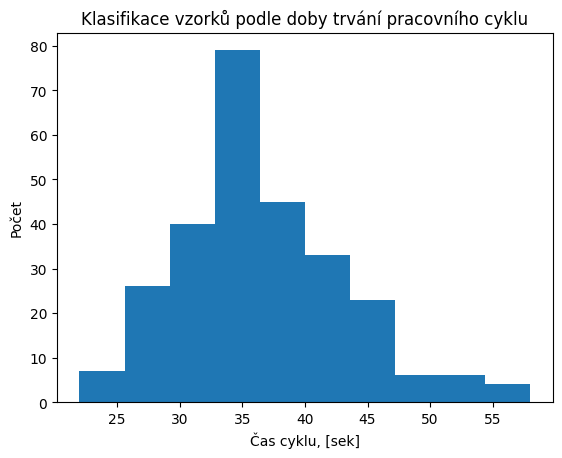

In [7]:
%matplotlib inline

plt.pyplot.hist(df["time"])

plt.pyplot.xlabel("Čas cyklu, [sek]")
plt.pyplot.ylabel("Počet")
plt.pyplot.title("Klasifikace vzorků podle doby trvání pracovního cyklu")

In [8]:
# Definice intervalů (binů) pro diskrétní rozdělení dat
bins = np.linspace(min(df["time"]), max(df["time"]), 8)
bins

array([22.        , 27.14285714, 32.28571429, 37.42857143, 42.57142857,
       47.71428571, 52.85714286, 58.        ])

In [9]:
# pojmenování intervalů (binů) pro diskrétní rozdělení dat
group_names = ['Extremely short','Very short','Short', 'Normal', 'Long','Very long','Extremely long']

In [10]:
# Kategorizace intervalů
df['time_binned'] = pd.cut(df['time'], bins, labels=group_names, include_lowest=True )
df[['time','time_binned']].head(20)

,time,time_binned
0,44,Long
1,35,Short
2,36,Short
3,36,Short
4,34,Short
5,34,Short
6,34,Short
7,33,Short
8,36,Short
9,42,Normal


In [11]:
# Výpočet počtu vzorků v intervalech
df["time"].value_counts()

time
34    23
37    23
33    21
36    18
35    17
32    16
38    13
31    12
30    12
42    10
41     9
46     9
28     9
39     9
40     9
26     8
45     6
24     6
44     5
29     5
43     5
27     4
47     3
53     3
48     2
55     2
52     2
49     2
50     2
58     1
56     1
22     1
54     1
Name: count, dtype: int64

### Grafické znázornění intervalového rozdělení

Text(0.5, 1.0, 'Klasifikace vzorků podle doby trvání pracovního cyklu')

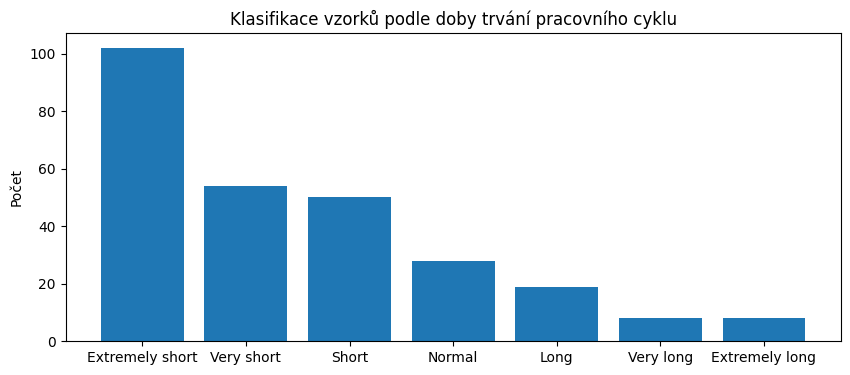

In [12]:
%matplotlib inline
pyplot.figure(figsize=(10,4))
pyplot.bar(group_names, df["time_binned"].value_counts(), )

pyplot.ylabel("Počet")
pyplot.title("Klasifikace vzorků podle doby trvání pracovního cyklu")

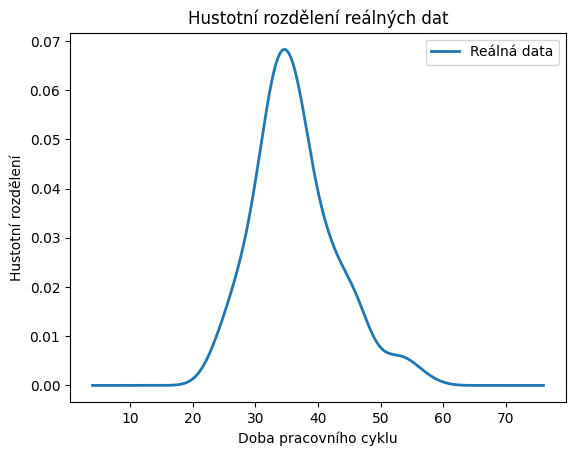

In [13]:
# Plot density
df['time'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Reálná data')
pyplot.legend()
pyplot.xlabel("Doba pracovního cyklu")
pyplot.ylabel("Hustotní rozdělení")
pyplot.title('Hustotní rozdělení reálných dat')
pyplot.show()

### Indikátorová (dummy) proměnná

In [14]:
df.columns

Index(['id', 'x', 'y', 'z', 'time', 'delay', 'type_delay', 'total_time',
       'time_binned'],
      dtype='object')

In [15]:
dummy_variable_1 = pd.get_dummies(df["type_delay"])
dummy_variable_1.head()

,0,1,2,3,4
0,True,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


In [16]:

# Změna názvů sloupců pro větší přehlednost
dummy_variable_1.rename(columns={0:'wo_delay', 1:'material', 2:'service', 3:'rotation', 4:'system'}, inplace=True)
dummy_variable_1.head()

,wo_delay,material,service,rotation,system
0,True,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


In [17]:
# Sloučení datových rámců "df" a "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)
df.head()

,id,x,y,z,time,delay,type_delay,total_time,time_binned,wo_delay,material,service,rotation,system
0,1,220,95,0,44,0,0,44,Long,True,False,False,False,False
1,2,220,252,0,35,0,0,35,Short,True,False,False,False,False
2,3,220,440,0,36,109,1,145,Short,False,True,False,False,False
3,4,220,690,0,36,0,0,36,Short,True,False,False,False,False
4,5,220,940,0,34,0,0,34,Short,True,False,False,False,False


### Export datové sady do formátu CSV

In [18]:
df.to_csv('../../data/01_DataScience/exploration_timelaps.csv', index=False)

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-20 | 1.1 | Vjačeslav Usmanov| added DS_02_Exploration.ipynb |
| 2026-02-11 | 1.2 | Vjačeslav Usmanov| changed DS_02_Exploration.ipynb |